# Quantum Teleportation

The idea of quantum teleportation is to utilise the property of quantum entanglement to send the
information of a qubit to another qubit without physically transferring the qubit. This avoids
the error that could be introduced while physically transferring the qubit, such as thermal
decoherence. 

One might think this process is instantaneous and violates the law that no information can be transmitted faster than the speed of light. However, this is not the case. Quantum teleportation is not an instant process, as it requires classical communication between the observers to correctly obtain the transmitted information. 

Let's say Alice and Bob are in different parts of the country, and Alice wants to send Bob a love letter using Quantum Teleportation. For one qubit of information to be "teleported" to Bob, Alice and Bob must share a set of entangled qubits. Here, we denote Alice has the qubit $q_1$ and Bob has the qubit ($q_2$). 

Once Alice prepares the qubit ($q_0$) that she wants to send to Bob, she performs a Bell measurement on the two qubits she has. This involves applying a CNOT-gate on $q_0$ with $q_1$ as the control, and then a H-gate on $q_0$. Post these two gates, then measurements are made on $q_0$ and $q_1$ to $c_0$ and $c_1$, respectively.

Alice then shares the classical bits ($c_0,c_1$) with Bob, and Bob applies $CNOT$ and $CZ$ gates according to Alice's classical bit. Bob applies a $Z$ gate on $q_2$ when $c_0$ is 1 and applies $X$ gate when $c_1$ is 1. When both $c_0$ and $c_1$ are 0, Bob does not have to apply any additional gates. This can be summarised in the table below: 
|$c_0$|$c_1$|Gates that Bob applies|
|:----:|:----:|:----:|
|0|0|$I$|
|0|1|$X$|
|1|0|$Z$|
|1|1|$XZ$|

Once Bob has performed the CNOT and CZ gates, Bob's qubit contains the information that Alice originally had in $q_0$. This does not break the no-cloning theorem as Alice no longer has the qubit information in either $q_0$ or $q_1$ as measurements have already been made on the two qubits and they have already collapsed. 


Below is an example of a quantum teleportation circuit. 

In [54]:
from qiskit_aer import Aer as Aer  # import from its own module. 
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, assemble, transpile
from qiskit.quantum_info import random_statevector,Statevector
from qiskit.visualization import plot_bloch_multivector

[0.02065396-0.56475199j 0.58972951-0.57692955j]


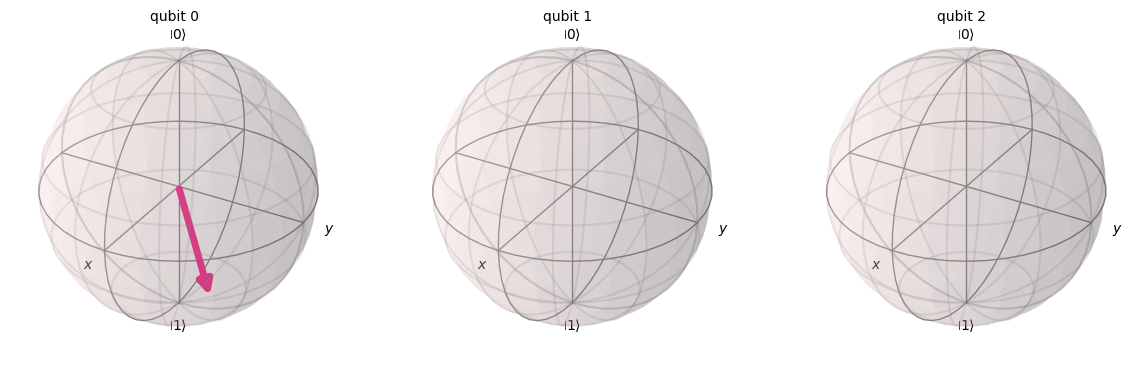

In [73]:
sim = Aer.get_backend('aer_simulator')

# Initialising the circuit with 3 qubits and 2 classical registers
# Alice has q0 and q1, while Bob has q2.
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Setting up the scenario that Alice and Bob share a set of entangled qubits
# This entangles q1 and q2
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])

# Getting the information that Alice is sending randomly
psi = random_statevector(2)  
print(psi.data)

# Initialising q0 to contain the information that Alice is sending to Bob
circuit.initialize(psi.data, 0)  

circuit.save_statevector(label='Before')
state = sim.run(circuit).result().data()['Before']

# Illustrating how the statevectors look like before the quantum teleportation circuit
# qubit 1 and qubit 2 are entangled, thus cannot be visualised using Qiskit
plot_bloch_multivector(state)

In [74]:
# Alice performs the Bell measurement 
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

# Bob applying CNOT and CZ gates on his qubit 
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[2])

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.02065396-0.56475199j,
             0.        +0.j        , 0.        -0.j        ,
             0.        +0.j        , 0.58972951-0.57692955j],
            dims=(2, 2, 2))


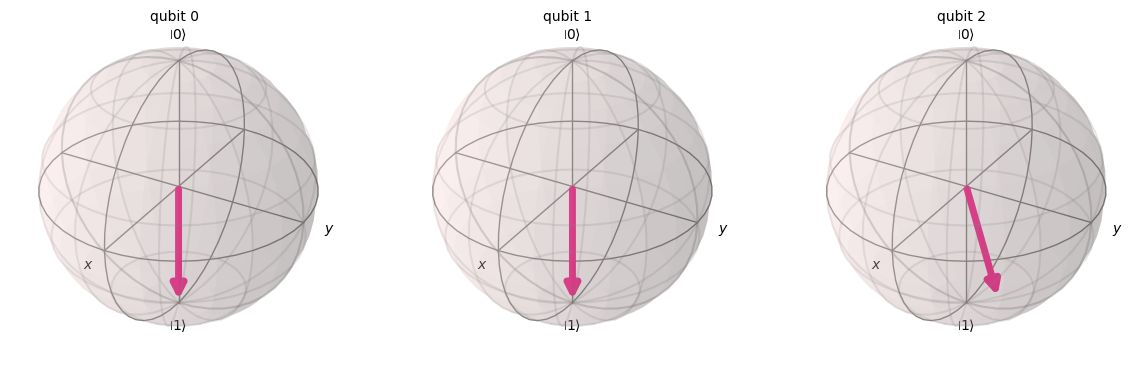

In [75]:
circuit.save_statevector(label='After')
state = sim.run(circuit).result().data()['After']
print(state)
plot_bloch_multivector(state)

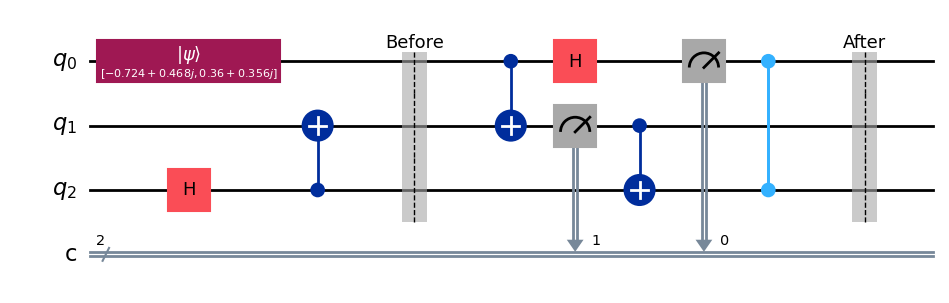

In [68]:
circuit.draw('mpl')